In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ameshousing/DataDictionary_AmesHousing.txt
/kaggle/input/ameshousing/Ames_Housing_Data.tsv


In [2]:
df = pd.read_csv('/kaggle/input/ameshousing/Ames_Housing_Data.tsv',sep='\t')

In [3]:
df['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: ylabel='Frequency'>

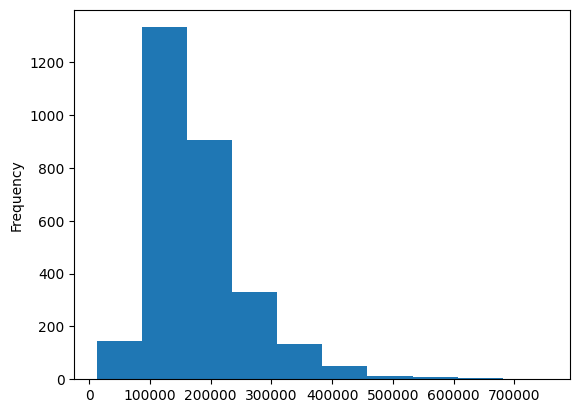

In [4]:
df['SalePrice'].plot.hist(bins=10)

In [5]:
sampling_error = []
sampling_size = []
n_sample = 5
population_mean = df['SalePrice'].mean()

for i in range(101):
    sample_mean =  df['SalePrice'].sample(n_sample,random_state=i).mean()
    sampling_error.append(population_mean - sample_mean)
    sampling_size.append(n_sample)
    n_sample += 29
    

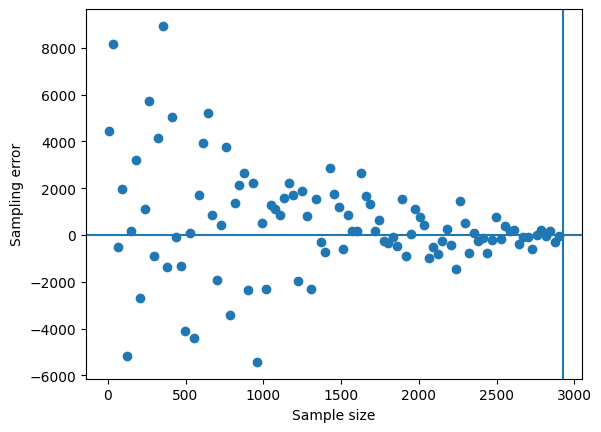

In [6]:
plt.scatter(sampling_size, sampling_error)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')
plt.show()

In [7]:
sample_mean_list = []
for i in range(10000):
    sample_mean = df['SalePrice'].sample(100,random_state=i).mean()
    sample_mean_list.append(sample_mean)

Text(0, 0.5, 'Frequency')

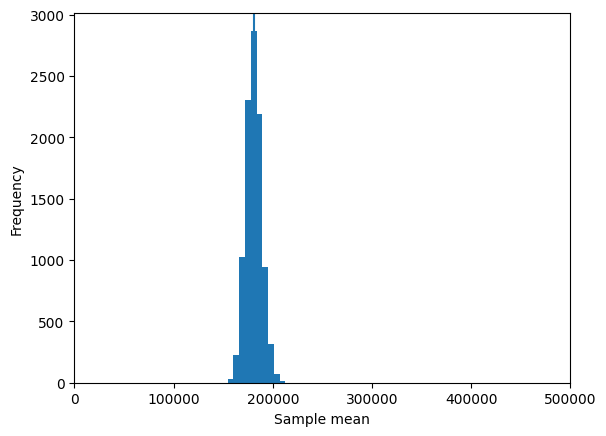

In [8]:
plt.hist(sample_mean_list)
plt.axvline(df['SalePrice'].mean())
plt.xlim(0,500000)
plt.xlabel('Sample mean')
plt.ylabel('Frequency')


In [12]:
houses_per_year = df.groupby('Yr Sold',as_index=False)['SalePrice'].agg(['mean','count'])
houses_per_year.rename(columns={'Yr Sold':'Year','mean':'Mean Price','count':'Houses Sold'},inplace=True)
houses_per_year

,Year,Mean Price,Houses Sold
0,2006,181761.648000,625
1,2007,185138.207493,694
2,2008,178841.750804,622
3,2009,181404.567901,648
4,2010,172597.598240,341


In [ ]:
# overall mean vs weighted mean